In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [14]:
drive.mount('/content/drive')

# Specify the path to your single CSV file
file_path = '/content/drive/MyDrive/DS200Labs/export_Monday.csv'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
def process_csv(file_path):
    df = pd.read_csv(file_path,parse_dates=['Timestamp'])
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = df[col].str.rstrip('%').astype('float')/100
            except:
                pass
    return df
df = process_csv(file_path)

df = df.drop(columns=['No.'])


<ipython-input-15-ef45810bc660>:2: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,parse_dates=['Timestamp'])


In [16]:
print(df.columns)

Index(['Timestamp', 'Ticker', 'Company', 'Country', 'Market Cap', 'P/E',
       'Shares Float', 'Insider Ownership', 'Insider Transactions',
       'Institutional Ownership', 'Institutional Transactions', 'Float Short',
       'Short Ratio', 'Short Interest', 'Performance (1 Minute)',
       'Performance (2 Minutes)', 'Performance (3 Minutes)',
       'Performance (5 Minutes)', 'Performance (10 Minutes)',
       'Performance (15 Minutes)', 'Performance (30 Minutes)',
       'Performance (1 Hour)', 'Performance (2 Hours)',
       'Performance (4 Hours)', 'Performance (Week)', 'Performance (Month)',
       'Performance (Quarter)', 'Performance (Half Year)',
       'Performance (Year)', 'Performance (YTD)', 'Average True Range',
       'Volatility (Week)', 'Volatility (Month)',
       '20-Day Simple Moving Average', '50-Day Simple Moving Average',
       '200-Day Simple Moving Average', 'Earnings Date', 'Change from Open',
       'Gap', 'Average Volume', 'Relative Volume', 'Volume', 'Prev

In [17]:
# Calculate Volume/Float and Volume*Float
df['Volume/Float'] = df['Volume'] / df['Shares Float']
df['Volume*Float'] = df['Volume'] * df['Shares Float']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Calculate Float Per Minute
df['Float Per Minute'] = df['Shares Float'] / 720

# Calculate minutes since 03:00:00
df['Minutes Since 3AM'] = (df['Timestamp'] - df['Timestamp'].dt.normalize() - pd.Timedelta(hours=3)).dt.total_seconds() / 60

# Calculate k
df['k'] = df['Volume'] / (df['Float Per Minute'] * df['Minutes Since 3AM'])

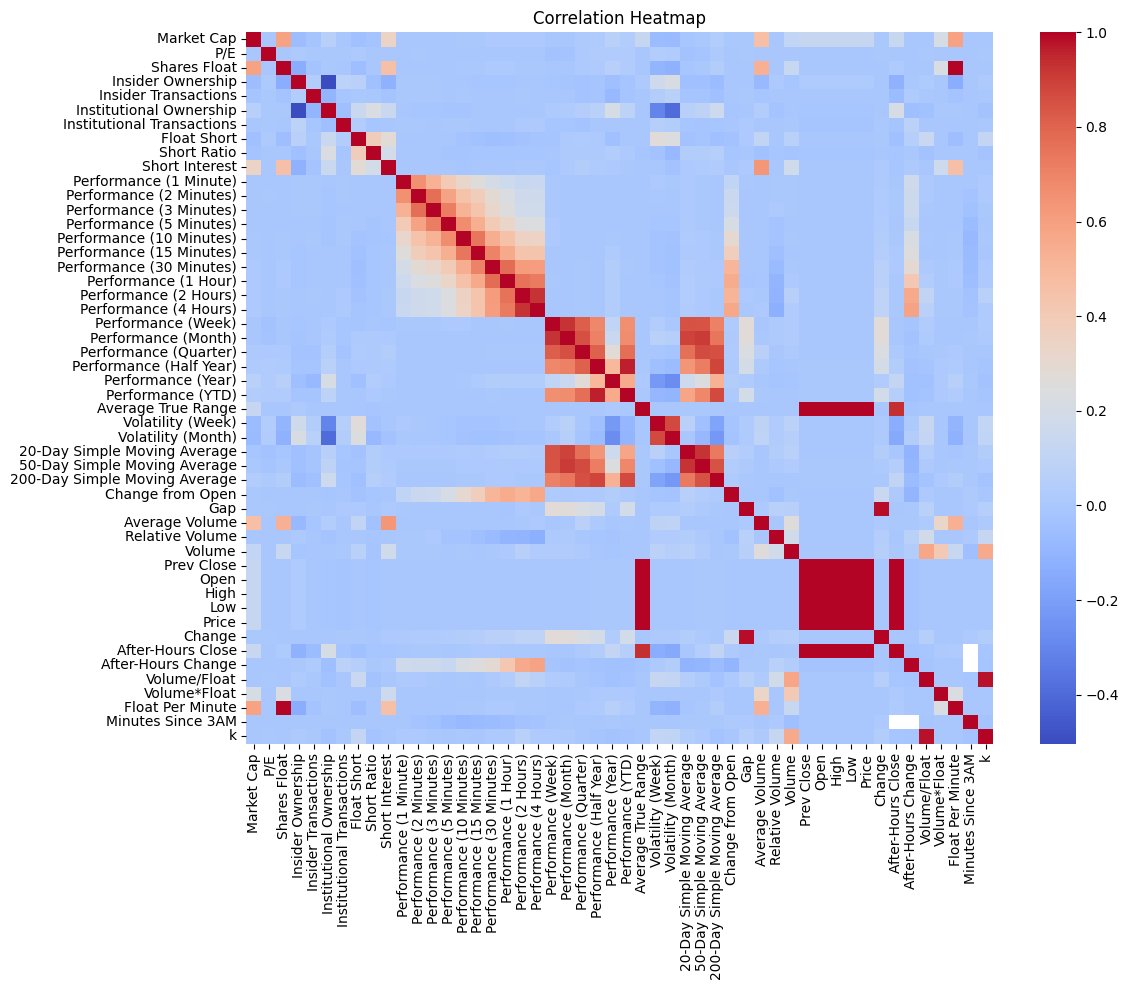

Top 10 positive correlations with Change:
Gap                        0.988172
Performance (Week)         0.272597
Performance (Month)        0.269512
Performance (Quarter)      0.225691
Performance (Half Year)    0.192774
Performance (YTD)          0.185935
Change from Open           0.140708
Performance (4 Hours)      0.091830
Performance (2 Hours)      0.091433
Performance (1 Hour)       0.070055
Name: Change, dtype: float64

Top 10 negative correlations with Change:
Price                     -0.000270
Low                       -0.000274
High                      -0.000275
Open                      -0.000277
Prev Close                -0.000285
After-Hours Close         -0.001532
After-Hours Change        -0.002127
Insider Ownership         -0.002277
Short Ratio               -0.004029
Institutional Ownership   -0.008826
Name: Change, dtype: float64

All correlations with Change:
Change                           1.000000
Gap                              0.988172
Performance (Week)    

In [18]:
# Convert 'Market Cap' to numeric, removing 'B' for billion if present
df['Market Cap'] = df['Market Cap'].replace('[\$,]', '', regex=True).replace('B', 'e9', regex=True).astype(float)

# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate correlation with 'Change'
correlations = df[numeric_columns].corr()['Change'].sort_values(ascending=False)

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Print top 10 positive and negative correlations
print("Top 10 positive correlations with Change:")
print(correlations[1:11])
print("\nTop 10 negative correlations with Change:")
print(correlations[-10:])

print("\nAll correlations with Change:")
print(correlations)